# "50 startups."

### _"Необходимо предсказать profit компаний от инвестирования" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [199]:
# import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

* ### Load Data

In [108]:
# read data from '.csv' files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [109]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [110]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [111]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [112]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [113]:
# target variable
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\DS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

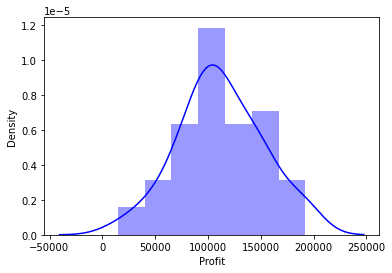

In [114]:
# visualisation of 'Profit' distribution
sns.distplot(target, color = 'b')

In [115]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [116]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print('Количество количественных признаков: ', len(numerical_feats_train))
print()
print(train[numerical_feats_train].columns)
print()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print('Количество категориальных признаков: ', len(categorical_feats_train))
print()
print(train[categorical_feats_train].columns)
print()

Количество количественных признаков:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Количество категориальных признаков:  2

Index(['State', 'Category'], dtype='object')



* ### Missing values

#### List of data features with missing values

In [117]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("Всего " + str(len(nan_columns)) +" столбца с NAN значениями в 50 строках.")
nan_columns


R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

Всего 3 столбца с NAN значениями в 50 строках.


['R&D Spend', 'Marketing Spend', 'Category']

In [118]:
# check the Test features with missing values
nan_columns2 = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print("Всего " + str(len(nan_columns2)) +" столбца с NAN значениями в 50 строках.")
nan_columns2

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

Всего 3 столбца с NAN значениями в 50 строках.


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [119]:
 # Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace = True)  
test.fillna(test.mean(), inplace = True)

# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = [
    'State', 
    'Category'
    ]

# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

In [120]:
# check is there any mising values left in Train
train.isnull().sum().sum()

0

In [121]:
# check is there any mising values left in Test
test.isnull().sum().sum()

0

#### Visualisation  of Numerical features (regplot)

C:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


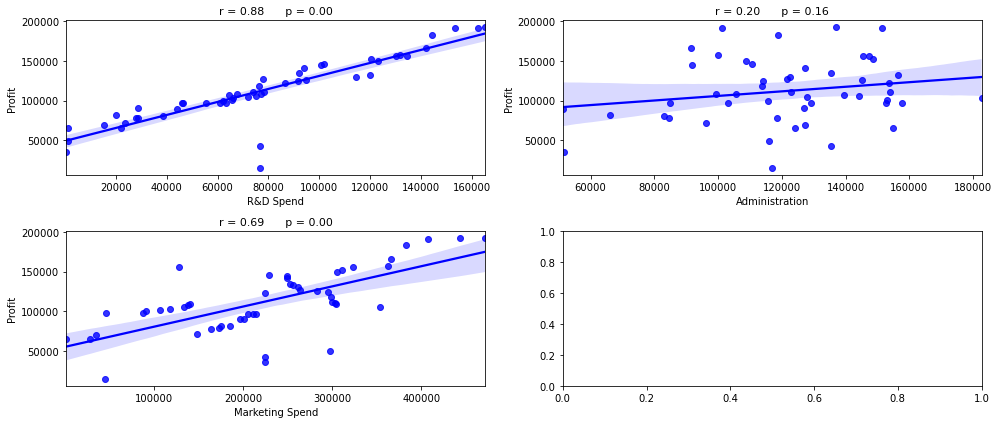

In [122]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols * 7,nr_rows * 3))

num_feats = list(numerical_feats_train)
num_feats
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in num_feats if c not in not_plot]
plot_num_feats

for r in range(0, nr_rows):
    for c in range(0, nr_cols):  
        i = r * nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "blue" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

<AxesSubplot:xlabel='State', ylabel='Profit'>

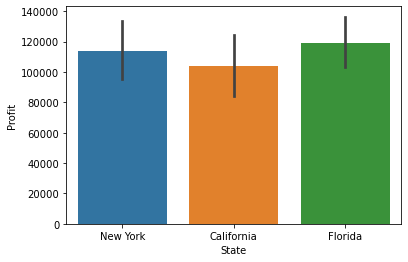

In [123]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x = 'State', y = 'Profit', data = train)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

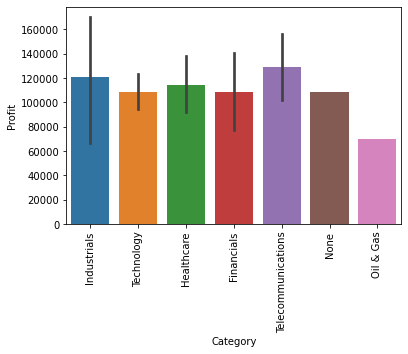

In [124]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x = 'Category', y = 'Profit', data = train)
plt.xticks(rotation=90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [125]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train,columns=['State', 'Category'])

# Drop target variable 
train = train.drop(columns=['Profit'])


In [126]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [127]:
# Train data shape
train.shape

(50, 13)

In [128]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test,columns=['State', 'Category'])

In [129]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [130]:
# Test data shape
test.shape

(50, 13)

In [131]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

* ### Creating datasets for ML part

In [132]:
# set 'X' for features of scaled Train dataset 'sc_train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = test 

* ### 'Train\Test' split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
X_train.shape

(40, 12)

In [135]:
X_test.shape

(10, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [138]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)
# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98849.87235257, 122116.57602136, 137849.35501159,  79737.39636388,
       188724.567639  , 119834.30660865,  74122.96770212,  68207.69501134,
       127610.41193548, 144209.13162721])

In [141]:
# Model R2 score
LRscore = r2_score(y_test,LR_pred)
LRscore

0.8048427033696935

In [143]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model':  'Linear Regression',
                          'r2score': r2_score(y_test,LR_pred),
                          'MAE':     metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE':     metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE':    np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE':    metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.804843,12955.723954,2.495850e+08,15798.26022,0.022844,0.151142


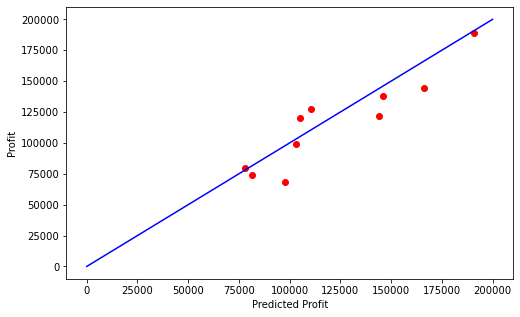

In [146]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [147]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1  

array([173556.09495044, 187967.14767515, 188724.567639  , 172877.72255146,
       144209.13162721, 168221.23679833, 148367.14478943, 158208.22321084,
       161165.08185437, 155314.16817928, 139028.06597658, 122116.57602136,
       124976.36184849,  99895.94052266, 145787.24608804, 138718.54629535,
       114058.80381785, 129625.91207613, 126710.5870917 , 121647.33269778,
       112691.17888279, 124078.09761898, 127610.41193548, 110723.01425093,
       110815.49753242, 101995.61110881, 102934.30057725, 119834.30660865,
        97258.81612859,  96726.05169651,  98266.60903382,  68207.69501134,
        80982.61349776,  93661.99438271,  98646.77730349,  83994.50516695,
        76730.53551093,  82200.5145506 ,  74122.96770212,  75387.61205895,
        86575.89685153,  79737.39636388,  72363.97251989,  69758.98000012,
        54185.66118755,  48960.60087956,  69580.80225684, 103029.5644045 ,
        38945.90579039,  67798.54452667])

In [148]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model':   'Linear Regression',
                           'r2score': r2_score(y,LR_pred1),
                           'MAE':     metrics.mean_absolute_error (y,LR_pred1),
                           'MSE':     metrics.mean_squared_error(y,LR_pred1),
                           'RMSE':    np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE':    metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.830464,11273.146641,2.699175e+08,16429.166532,0.077442,0.278283


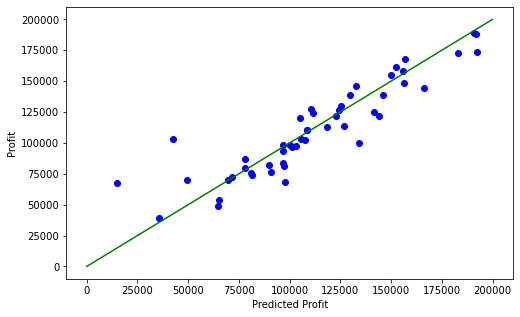

In [156]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'bo')
pl.plot([0,200000],[0,200000],'g-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [165]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='PuBuGn')

,Actual Profit,LR Predicted Profit
0,192261.830000,173556.094950
1,191792.060000,187967.147675
2,191050.390000,188724.567639
3,182901.990000,172877.722551
4,166187.940000,144209.131627
5,156991.120000,168221.236798
6,156122.510000,148367.144789
7,155752.600000,158208.223211
8,152211.770000,161165.081854
9,149759.960000,155314.168179


* #### Gradient Boosting Regressor

In [174]:
# Gradient Boosting Regressor model
GBR = GradientBoostingRegressor(random_state=0)

# Model Training
GBR.fit(X_train, y_train)

# Model Prediction
GBR_pred=GBR.predict(X_test)

# Model R2 score
GBRscore = GBR.score(X_test, y_test)
GBRscore

0.8824847873927326

In [178]:
# Model Metrics
GBRMetrics = pd.DataFrame({'Model':   'Gradient Boosting Regressor',
                           'r2score': r2_score(y_test,GBR_pred),
                           'MAE':     metrics.mean_absolute_error (y_test,GBR_pred),
                           'MSE':     metrics.mean_squared_error(y_test,GBR_pred),
                           'RMSE':    np.sqrt(metrics.mean_squared_error(y_test,GBR_pred)),
                           'MSLE':    metrics.mean_squared_log_error(y_test,GBR_pred),
                           'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y_test,GBR_pred))             
                           },index=[1])

GBRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Gradient Boosting Regressor,0.882485,9208.788341,1.502892e+08,12259.250281,0.018955,0.137676


In [177]:
# Test final predictions
GBR_pred1 = GBR.predict(X_Test)
GBR_pred1

array([191913.10015877, 191707.76242458, 182033.33425339, 182784.9460071 ,
       167605.80505737, 156980.43552722, 156120.14765574, 156074.69551261,
       151674.58020592, 150172.19900136, 133949.76538291, 135704.3860381 ,
       140698.3133958 , 134428.58372692, 132615.92953885, 130451.53720739,
       125818.14268686, 125999.65808307, 125027.49596068, 122474.81800804,
       117260.08855308, 111574.22224044, 111019.15391077, 109171.13240221,
       108293.55755732, 106789.41652237, 105233.26740018, 112590.56621151,
       101014.51997724, 101563.75263313,  99968.24272349,  67951.76504731,
        97333.97128401,  97233.70664379,  96689.70008757,  96269.8796492 ,
        90335.02978328,  89678.37450663,  68351.65916233,  81144.62161668,
        84069.76196763,  85232.63741053,  71397.05526255,  69837.4981078 ,
        65365.18545324,  64934.33775248,  49667.63012525,  51946.15542711,
        52674.25107637,  14623.24321345])

In [179]:
# Model Metrics
GBRMetrics1 = pd.DataFrame({'Model':   'Gradient Boosting Regressor',
                           'r2score': r2_score(y,GBR_pred1),
                           'MAE':     metrics.mean_absolute_error (y,GBR_pred1),
                           'MSE':     metrics.mean_squared_error(y,GBR_pred1),
                           'RMSE':    np.sqrt(metrics.mean_squared_error(y,GBR_pred1)),
                           'MSLE':    metrics.mean_squared_log_error(y,GBR_pred1),
                           'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y,GBR_pred1))             
                           },index=[1])

GBRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Gradient Boosting Regressor,0.976388,2720.496801,3.759267e+07,6131.286289,0.007695,0.087723


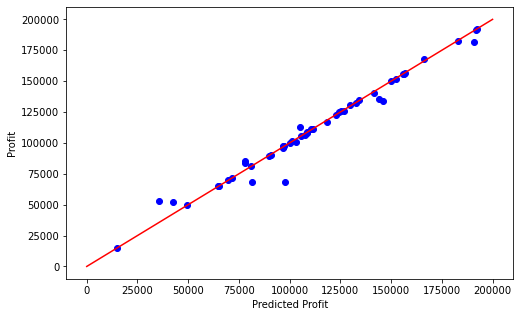

In [182]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GBR_pred1,'bo')
pl.plot([0,200000],[0,200000], 'r-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [185]:
# score comparison of models
frames = [LRMetrics1,GBRMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.830464,11273.146641,2.699175e+08,16429.166532,0.077442,0.278283
1,Gradient Boosting Regressor,0.976388,2720.496801,3.759267e+07,6131.286289,0.007695,0.087723


In [187]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y, "GB Predicted Profit":GBR_pred1, "LR Predicted Profit":LR_pred1,})
actualvspredicted.head(10).style.background_gradient(cmap='PuBuGn')

,Actual Profit,GB Predicted Profit,LR Predicted Profit
0,192261.830000,191913.100159,173556.094950
1,191792.060000,191707.762425,187967.147675
2,191050.390000,182033.334253,188724.567639
3,182901.990000,182784.946007,172877.722551
4,166187.940000,167605.805057,144209.131627
5,156991.120000,156980.435527,168221.236798
6,156122.510000,156120.147656,148367.144789
7,155752.600000,156074.695513,158208.223211
8,152211.770000,151674.580206,161165.081854
9,149759.960000,150172.199001,155314.168179


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

* #### LASSO

In [200]:
# Lasso Regression model
EN = ElasticNet()

# Model Training
EN.fit(X_train, y_train)
# Model Prediction
EN_pred = EN.predict(X_test)
EN_pred

array([100571.52123624, 122797.24339554, 128579.55543505,  72711.92309512,
       176376.94604553, 120083.63139358,  68324.94269339,  90318.41738118,
       118536.93941842, 159574.45845603])

In [205]:
# Model R2 score
ENscore = r2_score(y_test,EN_pred)
ENscore

0.8770229452823423

In [204]:
ENMetrics = pd.DataFrame({'Model':  'Elastic net',
                          'r2score': r2_score(y_test,EN_pred),
                          'MAE':     metrics.mean_absolute_error (y_test,EN_pred),
                          'MSE':     metrics.mean_squared_error(y_test,EN_pred),
                          'RMSE':    np.sqrt(metrics.mean_squared_error(y_test,EN_pred)),
                          'MSLE':    metrics.mean_squared_log_error(y_test,EN_pred),
                          'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y_test,EN_pred))             
                          },index=[1])

ENMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Elastic net,0.877023,11141.851307,1.572743e+08,12540.905925,0.011449,0.106999


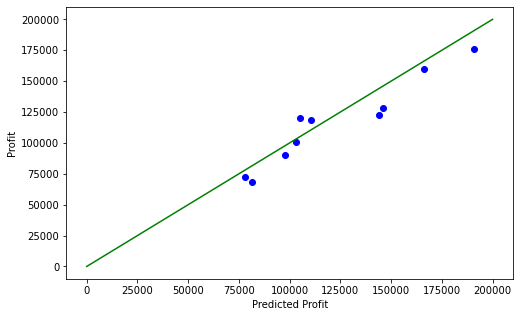

In [207]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, EN_pred,'bo')
pl.plot([0,200000],[0,200000],'g-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [208]:
# Test final predictions
EN_pred1 = EN.predict(X_Test)
EN_pred1  

array([189279.28226494, 185920.99251107, 176376.94604553, 169153.86110995,
       159574.45845603, 158499.64509127, 141871.56716085, 155967.7611302 ,
       152502.53989808, 146839.04803404, 129895.77807203, 122797.24339554,
       124162.41206516, 120159.40020311, 144550.96517854, 138623.74145129,
       113830.85074658, 130112.95750014, 125398.38953195, 122749.71389374,
       113814.23395386, 123231.95008452, 118536.93941842, 109864.57243333,
       104298.51894604,  97160.22791651, 103842.27940588, 120083.63139358,
       100143.32317887,  97952.49096571,  91351.82847461,  90318.41738118,
        84901.26628612,  93906.63041079,  93831.24933279,  85793.63627315,
        78067.77995331,  85191.15902276,  68324.94269339,  76578.54409791,
        88522.6606494 ,  72711.92309512,  67791.8980708 ,  57293.38761769,
        59631.22648804,  45972.68796802,  68941.30645149, 105499.28575477,
        42647.57573805,  90136.44300541])

In [210]:
# Model ElasticNet Metrics
ENMetrics1 = pd.DataFrame({'Model':   'Elastic Net',
                           'r2score': r2_score(y,EN_pred1),
                           'MAE':     metrics.mean_absolute_error (y,EN_pred1),
                           'MSE':     metrics.mean_squared_error(y,EN_pred1),
                           'RMSE':    np.sqrt(metrics.mean_squared_error(y,EN_pred1)),
                           'MSLE':    metrics.mean_squared_log_error(y,EN_pred1),
                           'RMSLE':   np.sqrt(metrics.mean_squared_log_error(y,EN_pred1))             
                           },index=[1])

ENMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Elastic Net,0.817752,10718.653584,2.901562e+08,17033.972672,0.09446,0.307344


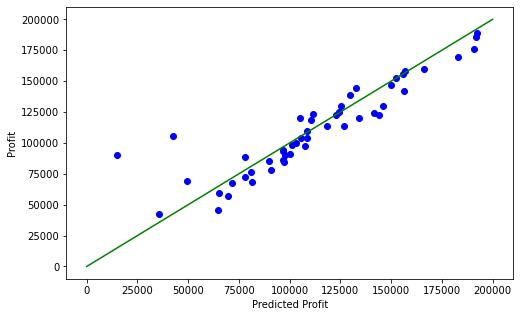

In [211]:
# visualisation of Test dataset predictions (LASSO)

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, EN_pred1,'bo')
pl.plot([0,200000],[0,200000],'g-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [212]:
# score comparison of models
frames = [LRMetrics1,GBRMetrics1, ENMetrics1]
TrainingResult2 = pd.concat(frames)
TrainingResult2

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.830464,11273.146641,2.699175e+08,16429.166532,0.077442,0.278283
1,Gradient Boosting Regressor,0.976388,2720.496801,3.759267e+07,6131.286289,0.007695,0.087723
1,Elastic Net,0.817752,10718.653584,2.901562e+08,17033.972672,0.094460,0.307344


In [215]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y, "GB Predicted Profit":GBR_pred1, "LR Predicted Profit":LR_pred1, "Elastic Predicted Profit":EN_pred1})
actualvspredicted.head(20).style.background_gradient(cmap='PuBuGn')

,Actual Profit,GB Predicted Profit,LR Predicted Profit,Elastic Predicted Profit
0,192261.830000,191913.100159,173556.094950,189279.282265
1,191792.060000,191707.762425,187967.147675,185920.992511
2,191050.390000,182033.334253,188724.567639,176376.946046
3,182901.990000,182784.946007,172877.722551,169153.861110
4,166187.940000,167605.805057,144209.131627,159574.458456
5,156991.120000,156980.435527,168221.236798,158499.645091
6,156122.510000,156120.147656,148367.144789,141871.567161
7,155752.600000,156074.695513,158208.223211,155967.761130
8,152211.770000,151674.580206,161165.081854,152502.539898
9,149759.960000,150172.199001,155314.168179,146839.048034


Result: The best model is Gradient Boosting Regressor with R2 score = 0.976388.

##  Conclusion.

In [217]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GBR_pred1
sub.to_csv('StartupPredictions.csv', index=False)